In [1]:
#  import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [3]:
# define variables
immo_vis_dir = "../../data/immo_vis/"
parquet_extension = ".parquet"
metropole_appartement_file = "ventes-metropole-appartement" + parquet_extension
metropole_maison_file = "ventes-metropole-maison" + parquet_extension

In [10]:
# import appartement file

start_path = Path(immo_vis_dir)
final_path = start_path / metropole_appartement_file
final_path.as_posix
df= pd.read_parquet(final_path.as_posix())
nb_rows= df.shape[0]
nb_cols= df.shape[1]

In [ ]:
#  print main infos on appartmeent file


print ( f" {metropole_appartement_file} rows {nb_rows} columns {nb_cols}")
print (df.shape)
print (df.columns)
print (df.info())
print (df.describe())



 ventes-metropole-appartement.parquet rows 2092723 columns 59
(2092723, 59)
Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'parking',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'nb_terraces', 'videophone',
       'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
       'charges_copro', 'chauffage_energie', 'chauffage_systeme',
       'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       '

/home/cv2169/.cache/pypoetry/virtualenvs/immocv-Hc0iPIjN-py3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
#  print columns modalities
for i in df.columns:
    print(f'modalities  {i} are : ',(df[i].nunique()))

In [ ]:
#  print comlmns nan values
for i in df.columns:
    print(f' {i} nan values {df[i].isna().sum()}  {(100*df[i].isna().sum()/len(df)):.2f}%')

In [11]:
# analyze type de bien
print (df['typedebien'].value_counts()) 
print (df['logement_neuf'].value_counts()) 
# print (df['typedebien'].value_counts(normalize=True)*100)
appartement_anciens = df.loc[df["typedebien"] == "a"]
appartement_neufs = df.loc[df["typedebien"] == "an"]

logement_anciens = df.loc[df["typedebien"] == "o"]
logement_neufs = df.loc[df["typedebien"] == "n"]

print ("appartement_neufs", appartement_neufs["logement_neuf"].value_counts())
print ("appartement_anciens", appartement_anciens["logement_neuf"].value_counts())


# select apppr
print ("appartements anciens , logement ancien ", appartement_anciens[appartement_anciens["logement_neuf"]== "o"].shape[0])
print ("appartements anciens , logement neuf ", appartement_anciens[appartement_anciens["logement_neuf"]== "n"].shape[0])

print ("appartements neufs , logement neuf ", appartement_neufs[appartement_neufs["logement_neuf"]== "n"].shape[0])
print ("appartements neufs , logement ancien ", appartement_neufs[appartement_neufs["logement_neuf"]== "o"].shape[0])

print (f" prix vente m2 appartements anciens  {appartement_anciens['prix_m2_vente'].median()}" )
print (f" prix vente m2 appartement_neufs {appartement_neufs['prix_m2_vente'].median()}")

print (f" prix vente m2 logements anciens  {logement_anciens['prix_m2_vente'].median()}" )
print (f" prix vente m2 logements neufs {logement_neufs['prix_m2_vente'].median()}")

print (f" dpeL appartements anciens  {appartement_anciens['dpeL'].mode()[0]}" )
print (f" dpeL  appartement_neufs {appartement_neufs['dpeL'].mode()[0]}")

print ("logement_neuf is not a relaible criteria")

typedebien
a     2012384
an      80339
Name: count, dtype: int64
logement_neuf
n    1928729
o     132863
Name: count, dtype: int64
appartement_neufs logement_neuf
o    79490
n      540
Name: count, dtype: int64
appartement_anciens logement_neuf
n    1928189
o      53373
Name: count, dtype: int64
appartements anciens , logement ancien  53373
appartements anciens , logement neuf  1928189
appartements neufs , logement neuf  540
appartements neufs , logement ancien  79490
 prix vente m2 appartements anciens  4050.0
 prix vente m2 appartement_neufs 4490.2
 prix vente m2 logements anciens  nan
 prix vente m2 logements neufs nan
 dpeL appartements anciens  D
 dpeL  appartement_neufs 0
logement_neuf is not a relaible criteria


In [12]:
#  modify logement_neuf according to type de bien
mask = (df["typedebien"] == "an") & (df["logement_neuf"]== "o")
df.loc[mask,'logement_neuf'] ="n"

mask = (df["typedebien"] == "a") & (df["logement_neuf"]== "n")
df.loc[mask,'logement_neuf'] ="o"

# replace an by a
df.loc[:,'typedebien'] ="a"

# process logement neuf as integer
df['logement_neuf'] = df['logement_neuf'].replace(['o','n'],[1,0])

print (df.typedebien.value_counts())
print (df.logement_neuf.value_counts())



typedebien
a    2092723
Name: count, dtype: int64
logement_neuf
1.0    1981562
0.0      80030
Name: count, dtype: int64


/tmp/ipykernel_71849/3240239398.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['logement_neuf'] = df['logement_neuf'].replace(['o','n'],[1,0])


## Drop columns that are not relevant

In [13]:
#rendre index=idannonce pour retrouver la ligne initiale
df.set_index('idannonce',drop=True,inplace=True)

#supprimer les colonnes non pertinentes pour les maisons
df.drop(columns=['type_annonceur', 'typedebien', 'typedetransaction','typedebien_lite',
       'prix_maison', 'prix_terrain', 'mensualiteFinance',"surface_terrain",
    #    'dpeC', #pas d'information supplémentaire sur dpeC par rapport à dpeL
    #    'date','eau',
       'categorie_annonceur',  'date', 'INSEE_COM', 'IRIS', 'duree_int',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7'], 
       inplace=True)

## Process prix_m2_vente

In [ ]:
# pre-analyse prix de vente au m2

plt.figure(figsize=(22,6))
plt.subplot(151)
sns.boxplot(df['prix_m2_vente'])
plt.subplot(152)
sns.histplot(df['prix_m2_vente'])
plt.subplot(153)
sns.scatterplot (df,x="surface",y="prix_m2_vente")
plt.show()


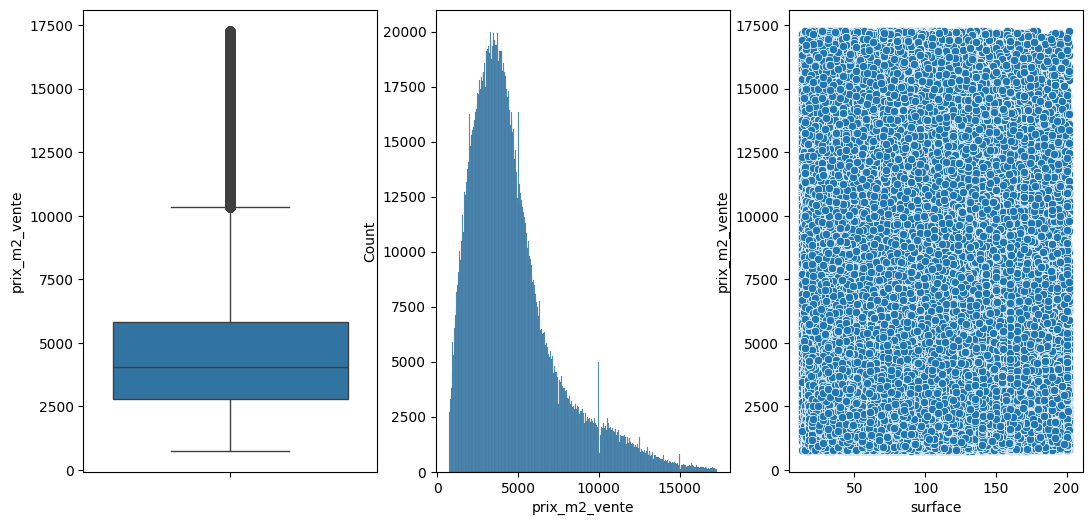

In [14]:


# remove outliers

colonnes_num_prim = ['surface',  'prix_m2_vente']

# Création du masque en utilisant apply
mask = df[colonnes_num_prim].apply(lambda x: (x >= x.quantile(0.005)) & (x <= x.quantile(0.995))| x.isna()).all(axis=1)
#ne garder que les lignes qui sont entre q=0.005 et q=0.995
df=df[mask]
#Vérification des résultats
df[colonnes_num_prim].describe()

(df['prix_m2_vente']*df['surface']-df['prix_bien']).describe()


plt.figure(figsize=(22,6))
plt.subplot(151)
sns.boxplot(df['prix_m2_vente'])
plt.subplot(152)
sns.histplot(df['prix_m2_vente'])
plt.subplot(153)
sns.scatterplot (df,x="surface",y="prix_m2_vente")
plt.show()

# 

## Traitement des colonnes  

In [ ]:
# analyse NA values
import matplotlib.ticker as mtick

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
# full_columns = df.columns[ df.isna().any() == False ]
print (f" nb_rows {nb_rows} nb_cols {nb_cols}")
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )
# print (f"columns without Nans {full_columns}")
# print (missing_values)
plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot (missing_values.index,missing_values.values)
plt.axhline(y=int(nb_rows/2), color='r', linestyle='--', label='50%')
plt.axhline(y=int(nb_rows*0.9), color='b', linestyle='--', label='90%')
plt.legend()

plt.xticks(rotation=80)
plt.title(f"Missing values  nb-rows = {nb_rows}")
ax2 = plt.subplot(122)
missing_values_percent = (missing_values/nb_rows)*100.0
plt.plot (missing_values_percent.index,missing_values_percent.values)
plt.axhline(y=50.0, color='r', linestyle='--', label='50%')
plt.axhline(y=90.0, color='b', linestyle='--', label='90%')
plt.xticks(rotation=80)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100)) 
plt.title(f"Missing values  percentage")
plt.legend()
plt.show()


## Process columns with too many NANs

In [ ]:
# detect  columns with too many NANs (90%)
print (df.shape)
threshold = .9
nan_cols = []
for name,_ in df.items() :
    if df[name].isna().sum()/nb_rows> threshold :
        nan_cols.append(name) 
print (f"empty cols {nan_cols}")

In [ ]:
# remove nan cols > threshold
df = df.drop(columns=nan_cols)

## Process numerical columns

In [ ]:
# scatter plot of numerical variables / prix_m2_vente 
columns = df.select_dtypes(include='number').columns.tolist()
df.sort_values(by="prix_m2_vente",ascending=True)
nrows = int(len(columns)/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (30,nrows*4))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1


In [ ]:
# remove outliers .99 % except nb_logements_copro, charges_copro

#  etage contains negative values
df.loc[:,'etage'] = df['etage'].abs() 

columns = ['bain', 'nb_toilettes', 'nb_pieces','eau','bain','nb_pieces','nb_terraces','balcon','places_parking','nb_etages','etage']
#limiter les colonnes à q=0.99 pour éliminer les outliers
threshold = 0.99
for column in columns :
    df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))


In [ ]:
# display 
nrows = int(len(columns)/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (30,15*nrows))
index = 0
for column in columns :
    sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
    index = index +1


In [ ]:
#  remove Nan values for numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
print (df[columns].isna().sum())


In [ ]:

#  place de parking
df["places_parking"] = df["places_parking"].fillna(0) 
# nombres de toilettes ( can not be guessed)
df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
# logement neuf
df["logement_neuf"] = df["logement_neuf"].fillna(0)
#  nombre de terraces
df["nb_terraces"] = df["nb_terraces"].fillna(0)
df.loc[:,"nb_terraces"] = 0

print (df[columns].isna().sum())



In [ ]:
# nb etages
print (df.nb_etages.value_counts(dropna=False))
fig = plt.figure(figsize=(16,8))
sns.countplot(data=df,x=df.nb_etages)
df["nb_etages"]= df["nb_etages"].fillna(df["nb_etages"].median())

In [ ]:
# annee de construction
print (df.nb_logements_copro.value_counts(dropna=False,normalize=True))
sns.scatterplot(y=df["prix_m2_vente"],x=df["annee_construction"])
df["annee_construction"]= df["annee_construction"].fillna(0)


In [ ]:
# nb logmeent copro
threshold=0.95
column="nb_logements_copro"
print (df[column].value_counts(dropna=False,normalize=True))
sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
plt.show()
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
plt.show()
print (df[column].median())
df[column]= df[column].fillna(0)



In [ ]:
# charges copro
threshold=0.95
column="charges_copro"
print (df[column].value_counts(dropna=False,normalize=True))
sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
plt.show()
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
plt.show()
print (df[column].median())
df[column]= df[column].fillna(0)



In [ ]:
#  remove Nan values for numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
print (df[columns].isna().sum())

In [ ]:
column="dpeC"
threshold=.99
print (df[column].value_counts(dropna=False,normalize=True))
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
fig = plt.figure(figsize=(16,8))
sns.scatterplot(y=df[column],x=df["dpeL"])
plt.show()
result = df.groupby("dpeL")[column].mean()
print (result)
fig = plt.figure(figsize=(16,8))
sns.scatterplot(y=result.values,x=result.index)
plt.show()

In [ ]:
#  drop dpeC : colinearity with dpeL
column="dpeC"
df = df.drop(columns=[column])

In [ ]:
#  remove Nan values for numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
print (df[columns].isna().sum())


## Process categorial columns

In [15]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")

dpeL: ['D' 'C' 'E' 'NS' '0' 'F' 'VI' 'B' 'G' 'A' 'D - 231 kWh/m².year' 'Blank'
 'D-218 kWh/m².year' 'E kWh/m².year' 'D kWh/m².year' 'C kWh/m².year'
 'A kWh/m².year' "'" '856']
annonce_exclusive: ['Oui' 'Non' '0']
parking: [None True False]
cave: [False True None]
exposition: ['0' 'Sud-Est' 'Sud' 'Est' 'SO' 'Ouest' 'E, S' 'Nord-Ouest' 'Nord-Sud'
 'traversant' 'Sud-Ouest' 'sud-ouest' 'Nord' 'Est-Ouest'
 'traversant nord-sud' 'sud-est' 'Nord-Est' 'OUEST' 'Traversant-Est-Ouest'
 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord Sud Est Ouest' 'Nord-ouest'
 'Sud-Est-Ouest' 'nord-est / sud-ouest' 'EST SUD OUEST' 'SUD EST'
 'nord-ouest / sud-est' 'Nord Sud Ouest' 'NO' 'Nord-est' 'sud est'
 'sud,ouest' 'NS' 'EST' 'Sud Ouest  Nord Ouest' 'nord,est' 'nord,ouest'
 'sud,est' 'SUD Ouest' 'NE' 'nord,sud' 'Sud et Est' 'Sud/Est' 'Sud/Ouest'
 'Nord/Ouest' 'Nord Est Ouest' 'S/E' 'est / ouest' 'N' 'ON' 'SE/SO'
 'EST / OUEST' 'Est Sud' 'Suid Ouest' 'Ouest Sud' 'OUEST / SUD'
 'sud ouest' 'OUET' 'Sud / Nord sur cour' 

['D' 'C' 'E' 'NS' '0' 'F' 'VI' 'B' 'G' 'A' 'D - 231 kWh/m².year' 'Blank'
 'D-218 kWh/m².year' 'E kWh/m².year' 'D kWh/m².year' 'C kWh/m².year'
 'A kWh/m².year' "'" '856']
0
dpeL
D                      517299
0                      313435
E                      305169
C                      299279
NS                     178234
VI                     132149
B                       97118
F                       93049
A                       73049
G                       46423
Blank                      20
D kWh/m².year               6
E kWh/m².year               6
A kWh/m².year               3
C kWh/m².year               3
D - 231 kWh/m².year         1
D-218 kWh/m².year           1
'                           1
856                         1
Name: count, dtype: int64
dpeL
D          517307
0          313435
E          305175
C          299282
NS         178234
F/G        132149
B           97118
F           93049
A           73052
G           46423
Unknown        22
Name: count, dtype: int6

<Axes: xlabel='dpeL', ylabel='Count'>

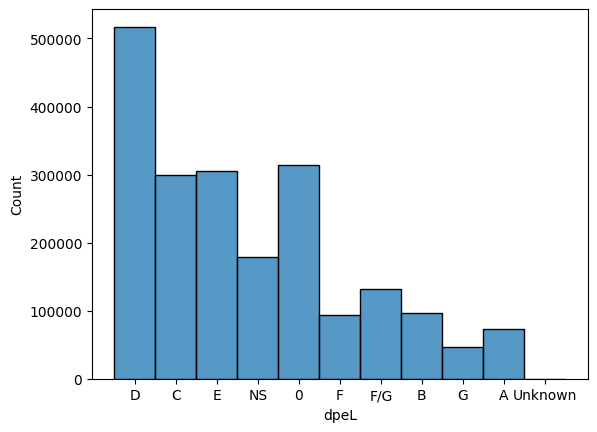

In [16]:
#  Process dpel
#  NS means non significative
# how to take into account dpe zero ?
print(df["dpeL"].unique())
print(df["dpeL"].isna().sum())
print(df["dpeL"].value_counts())
df["dpeL"] = df["dpeL"].replace(to_replace=["D - 231 kWh/m².year","D-218 kWh/m².year","Blank",'0 kWh/m².year'],value=["D","D","Unknown","0"])
df["dpeL"] = df["dpeL"].replace(to_replace=["E kWh/m².year","D kWh/m².year","C kWh/m².year","A kWh/m².year","856","'"],value=["E","D","C","A","Unknown","Unknown"])

df["dpeL"] = df["dpeL"].replace(to_replace=["VI"],value=["F/G"])
# df['dpeL'] = pd.Categorical(df['dpeL'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

print(df["dpeL"].value_counts())

sns.histplot(df["dpeL"])


ges_class
B                        339236
C                        295738
D                        247088
A                        214101
E                        182284
VI                       135777
NS                        70236
F                         64539
G                         31279
Blank                        28
B kg CO2/m².year             10
A kg CO2/m².year             10
0 kg CO2/m².year              6
F kg CO2/m².year              2
D - 49 kg CO2/m².year         1
E-41 kg CO2/m².year           1
E kg CO2/m².year              1
D kg CO2/m².year              1
C kg CO2/m².year              1
Name: count, dtype: int64
ges_class
Unknown    545177
B          339246
C          295739
D          247090
A          214111
E          182286
F/G        135777
F           64541
G           31279
Name: count, dtype: int64


<Axes: xlabel='ges_class', ylabel='Count'>

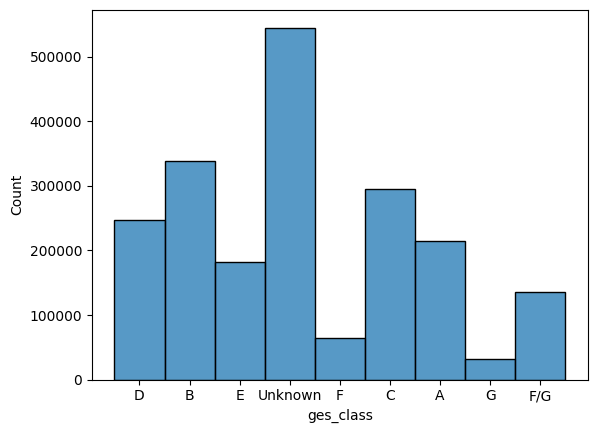

In [17]:
# process categorial ges_class : gaz a effet de serre : set to unknown
print(df["ges_class"].value_counts())

df["ges_class"] = df["ges_class"].fillna("Unknown")
df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank","0 kg CO2/m².year"],value=["D","E","Unknown","Unknown"])
df["ges_class"] = df["ges_class"].replace(to_replace=["VI"],value=["F/G"])
df["ges_class"] = df["ges_class"].replace(to_replace=["A kg CO2/m².year","E kg CO2/m².year","B kg CO2/m².year","C kg CO2/m².year","D kg CO2/m².year","F kg CO2/m².year","NS"],value=["A","E","B","C","D","F","Unknown"])
#df['ges_class'] = pd.Categorical(df['ges_class'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

print(df["ges_class"].value_counts())

sns.histplot(df["ges_class"])


In [18]:
# annon exclusive
print(df["annonce_exclusive"].value_counts())
df["annonce_exclusive"] = df["annonce_exclusive"].replace(to_replace=['Oui','Non','0'],value=[1,0,2]).astype(int)


annonce_exclusive
Non    969650
Oui    817726
0      267870
Name: count, dtype: int64


/tmp/ipykernel_71849/136362253.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["annonce_exclusive"] = df["annonce_exclusive"].replace(to_replace=['Oui','Non','0'],value=[1,0,2]).astype(int)


parking
True     8012
False    1515
Name: count, dtype: int64


/tmp/ipykernel_71849/3953044715.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["parking"] = df["parking"].replace(to_replace=[True,False,None],value=[1,0,2])


<Axes: xlabel='parking', ylabel='Count'>

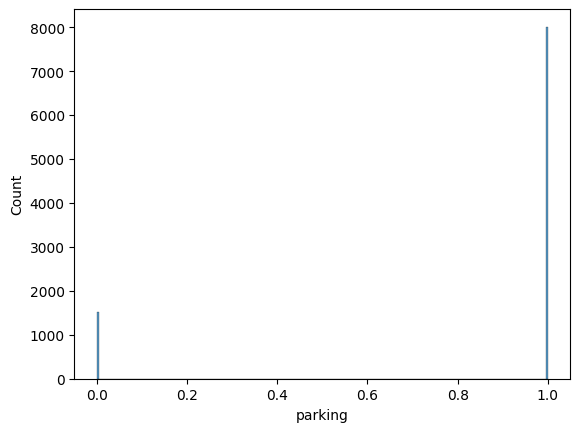

In [ ]:
print(df["parking"].value_counts())
df["parking"] = df["parking"].replace(to_replace=[True,False],value=[1,0])
sns.histplot(df["parking"])


cave
True     518319
False    394592
Name: count, dtype: int64


/tmp/ipykernel_71849/175812650.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cave"] = df["cave"].replace(to_replace=[False,True],value=[0,1])


<Axes: xlabel='cave', ylabel='Count'>

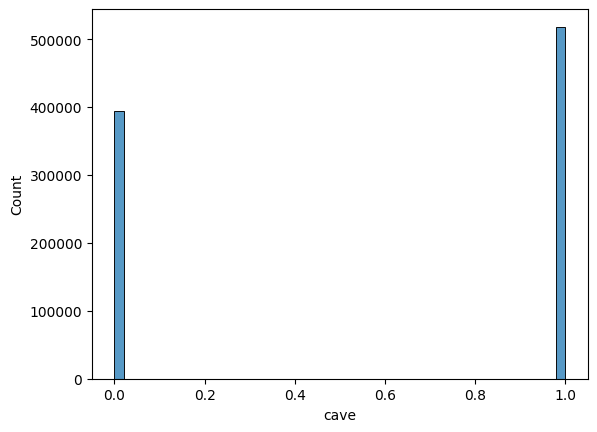

In [21]:
print(df["cave"].value_counts())
df["cave"] = df["cave"].replace(to_replace=[False,True],value=[0,1])
sns.histplot(df["cave"])


In [ ]:
print(df["chauffage_energie"].value_counts())
df["chauffage_energie"] = df["chauffage_energie"].fillna("unknown")


df['chauffage_energie'] = df['chauffage_energie'].str.lower()
df['chauffage_energie'] = df['chauffage_energie'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)
df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["électrique"],value=["elec"],regex=True)
print(df["chauffage_energie"].unique())

#  create sub-categories
energies = ["gaz","elec","bois","fioul"]
for energy in energies :
    target = "chauf-" + energy
    print(target)
    df[target] = df["chauffage_energie"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())

for energy in energies :
#  simplify chauffage-energie to first value
    df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : energy if x.startswith(energy) else x)

# df['chauffage_energie'] = pd.Categorical(df['chauffage_energie'], energies)


plt.figure(figsize=(14,8))
sns.histplot(df["chauffage_energie"])

plt.figure(figsize=(14,6))
plt.subplot(141)
sns.histplot(df["chauf-fioul"],discrete=True)
plt.subplot(142)
sns.histplot(df["chauf-bois"],discrete=True)
plt.subplot(143)
sns.histplot(df["chauf-gaz"],discrete=True)
plt.subplot(144)
sns.histplot(df["chauf-elec"],discrete=True)
plt.show()


chauffage_energie
unknown            995429
elec               520296
gaz                513654
fioul               22582
bois                 1338
gaz,elec              910
elec,bois             646
gaz,bois              222
fioul,elec             57
gaz,fioul              31
fioul,bois             28
bois,elec              19
elec,fioul             13
bois,fioul             12
gaz,elec,bois           5
bois,fioul,elec         2
elec,fioul,bois         1
elec,bois,fioul         1
Name: count, dtype: int64
['fioul' 'gaz' 'elec' 'unknown' 'elec,bois' 'gaz,bois' 'bois' 'gaz,elec'
 'bois,elec' 'fioul,bois' 'fioul,elec' 'gaz,fioul' 'bois,fioul'
 'gaz,elec,bois' 'elec,fioul' 'elec,fioul,bois' 'elec,bois,fioul'
 'bois,fioul,elec']
chauf-gaz
chauf-gaz
0    1540424
1     514822
Name: count, dtype: int64
chauf-elec
chauf-elec
0    1533296
1     521950
Name: count, dtype: int64
chauf-bois
chauf-bois
0    2052972
1       2274
Name: count, dtype: int64
chauf-fioul
chauf-fioul
0    2032519
1      2

: 